# Population Biology Review

In [31]:
import handcalcs.render
import math as math
from sympy import * #symbolic algebra package
import numpy as np #numerical python packagee
import matplotlib.pyplot as plt #matplotlib is a plotting package
%matplotlib inline  
# without this plots are popouts

Fisheries  and biology in general involves growth of organism and poulations. the stock of fish changes overtime, 
it increases through natural growth and decreases through natural mortality and fishing.

We will start by reviewing some basic models of poulation growth. You have most likely seen versions of these beofre but not to the elvel of detail we will cover here.


# Logistic Growth


Let us first write some simple python code to simulate logistic growth. We will do this in stages.

Let's start with exponential growth

$x(t) = x_0 e^{rt}$

$x_0$ is an initial value (The starting value of say a stock of fish) without limits to food, resources (nutrients), space, predation, etc. the stock would continue to grow. Let us plot this

Text(0.5, 1.0, 'Exponetial growth')

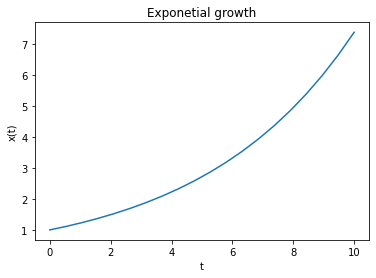

In [32]:
x0 = 1 #choose a starting value
r = 0.2 #choose a growth rate
t = np.linspace(0,10,20) #define an x-axis
x = x0*np.exp(r*t) #function to plot
plt.plot(t,x) # plot pairs of values
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Exponetial growth")


## What is the rate of change of this over time?


To determine the rate of change we need to examine how the stock changes with time


In [38]:
x0, r, t = symbols('x0 r t')
deriv = diff(x0*exp(r*t),t) #differrentiates the function, 
#calculates the slop of the curve at the point t
deriv

r*x0*exp(r*t)

Now we need to substitute in $x(t)$. to get $\frac{dx(t)}{dt} = rx(t)$

divide both sides by $x(t)$ to get a rate of change

$\frac{1}{x(t)}\frac{dx(t)}{dt} = r$ Basically this is like a percentage change.


Becauase stocks can't grow forever we penalize their growth by a mortality term $r \frac{x(t)^2}{K}$ where $K$ called the carrying capcity is a measure of the available resources need to sustain the population.

Combining this we get 

$\frac{dx(t)}{dt} = r x(t)(1-\frac{x(t)}{K})$

where $\frac{x(t)}{K}$ is a density dependent mortality term.



## Discrete-time dynamics

In [ ]:
#Constants 
r = 1.8 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
x[0] = x0 # pass initial value to vector
for i in range(0,len(x)-1):
     x[i+1] = x[i] + r*x[i]*(1-x[i]/K)
print(x) 
